# Zero to Hero

## 1.07 Aplicando el arbol

Se aplicará el modelo generado por rpart a los datos nuevos y se genera la salida para Kaggle

In [1]:
rm( list=ls())
gc()

library( "data.table")   #cargo la libreria  data.table
library( "rpart")  #cargo la libreria  rpart
library( "rpart.plot")

options(repr.plot.width=20, repr.plot.height=10) 
setwd("C:/Archivos/dmeyf")  #se establece el directorio de trabajo


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,555389,29.7,1175895,62.8,1003444,53.6
Vcells,1014911,7.8,8388608,64.0,1632009,12.5


In [3]:
dtrain <- data.table::fread("./datasetsOri/paquete_premium_202009.csv")   #cargo el dataset

In [4]:
#genero el modelo
modelo <-  rpart::rpart(formula= "clase_ternaria ~ ." ,
                        data= dtrain,
                        xval= 0,
                        cp= -1,
                        maxdepth= 2 )

Cargo el dataset a donde voy a aplicar el modelo

In [6]:
dapply <- data.table::fread("./datasetsOri/paquete_premium_202011.csv")   #cargo el dataset

Aplico el modelo a los datos dapply  pidiendo que me devuelva probabildades

In [7]:
prediccion  <- predict( modelo, dapply, type = "prob")

Analizo que queda en prediccion

In [8]:
head( prediccion )

,BAJA+1,BAJA+2,CONTINUA
1,0.0008329049,0.001053985,0.9981131
2,0.0008329049,0.001053985,0.9981131
3,0.0008329049,0.001053985,0.9981131
4,0.0008329049,0.001053985,0.9981131
5,0.0008329049,0.001053985,0.9981131
6,0.0008329049,0.001053985,0.9981131


Prediccion es una matriz; me interesa la columna "BAJA+2"  que es la probabilidad que modelo asigna a cada registro de dapply

In [9]:
prob_baja2  <- prediccion[, "BAJA+2"]

In [10]:
head( prob_baja2)

1           2           3           4           5           6 
0.001053985 0.001053985 0.001053985 0.001053985 0.001053985 0.001053985

prob_baja2 es el vector de probabilidades

In [13]:
length( prob_baja2 )
nrow( dapply )

[1] 238986

[1] 238986

Ahora decido si envio el estimulo o no
<br>
si prob( BAJA+2) > 0.025  envio  el estímulo

In [14]:
Predicted   <- ifelse( prob_baja2 > 0.025, 1, 0 )

In [15]:
head( Predicted)

1 2 3 4 5 6 
0 0 0 0 0 0

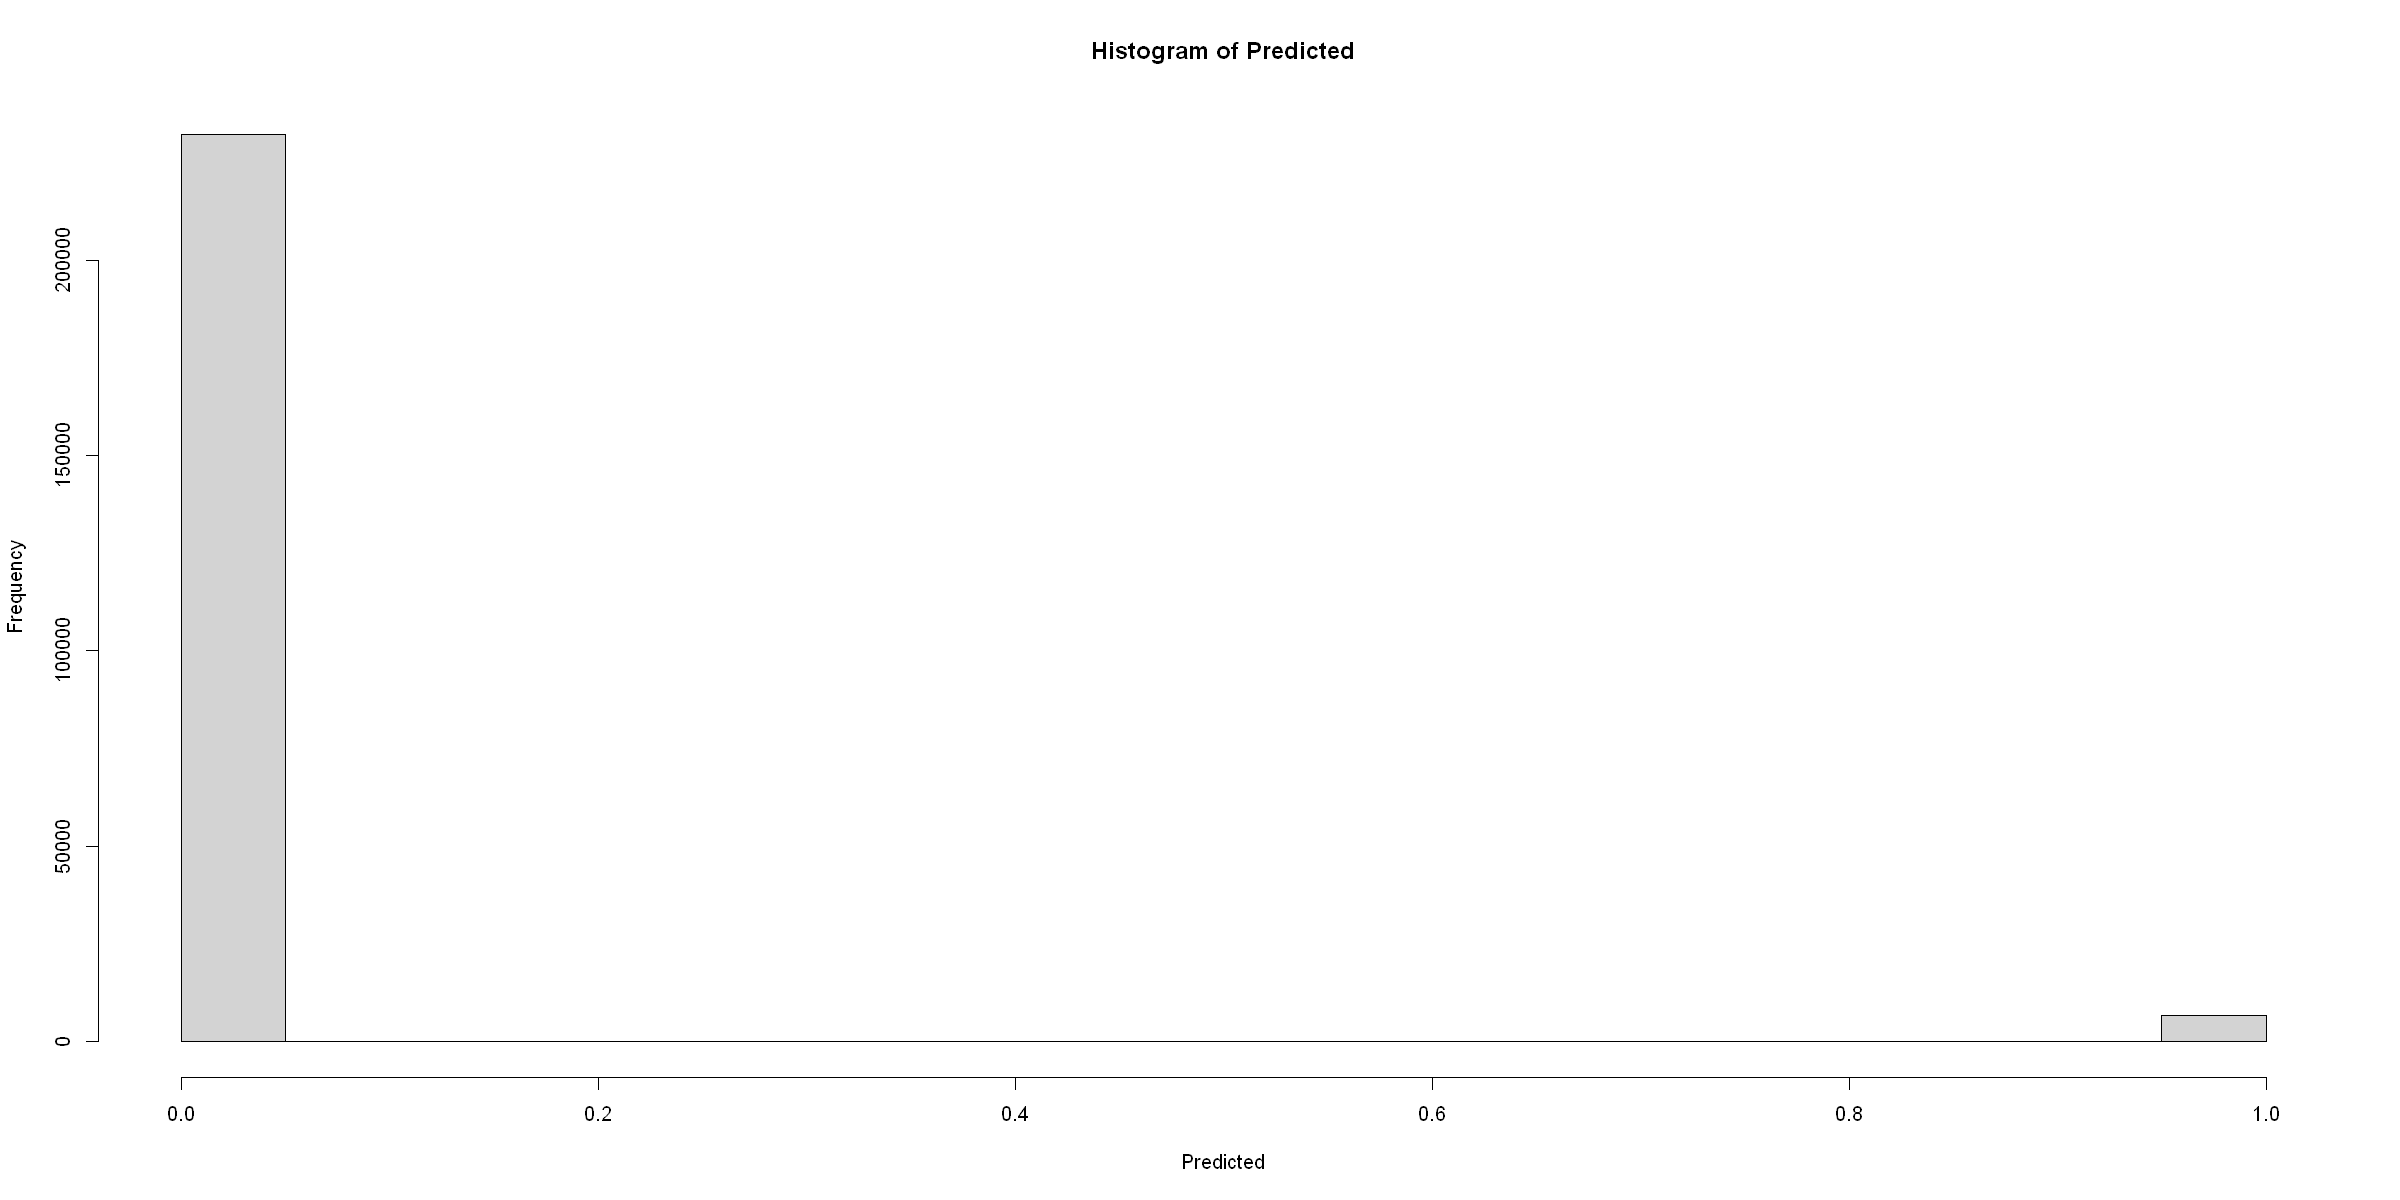

In [16]:
hist( Predicted)

creo una tabla con  lo que voy a enviar a Kaggle

In [17]:
entrega  <-  as.data.table( list( "numero_de_cliente"=dapply$numero_de_cliente, "Predicted"=Predicted)  )

In [18]:
head( entrega)

numero_de_cliente,Predicted
<int>,<dbl>
4572294,0
4572366,0
4572633,0
4572728,0
4572765,0
4572913,0


In [19]:
entrega[ , .N, Predicted]

Predicted,N
<dbl>,<int>
0,232256
1,6730


Esto significa que se enviaran 8157 estímulos

In [20]:
#genero el archivo para Kaggle
fwrite( entrega, 
        file= "./kaggle/para_Kaggle_0107.csv",
        sep=  "," )

Subiendo a Kaggle la prediccion anterior se obtiene en el Public Leaderboard 14.58786